<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

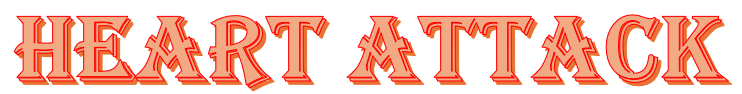

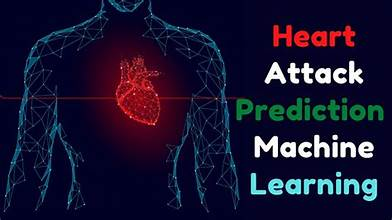

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:WHITE;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

In [3]:
data = pd.read_csv('Heart Attack.csv')
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [5]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Visualization</p></b></h1>

# Plotts

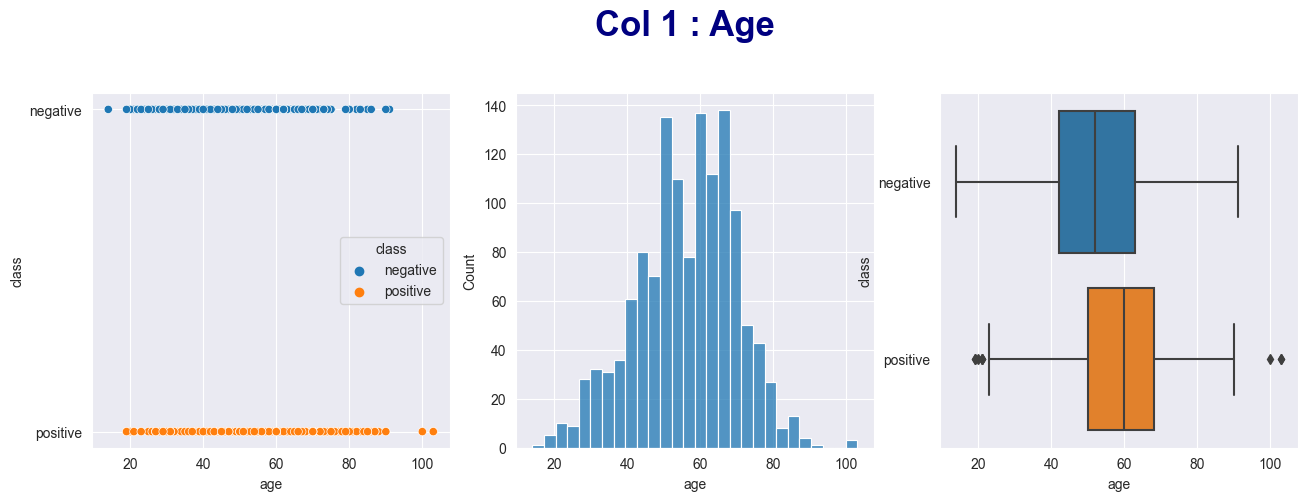

In [9]:
# col1 : Age
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 1 : Age', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)
# ax1
sns.scatterplot(data=data, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='age', ax=axes[1])

# ax3
sns.boxplot(data=data, x='age', y='class', ax=axes[2])

plt.show()

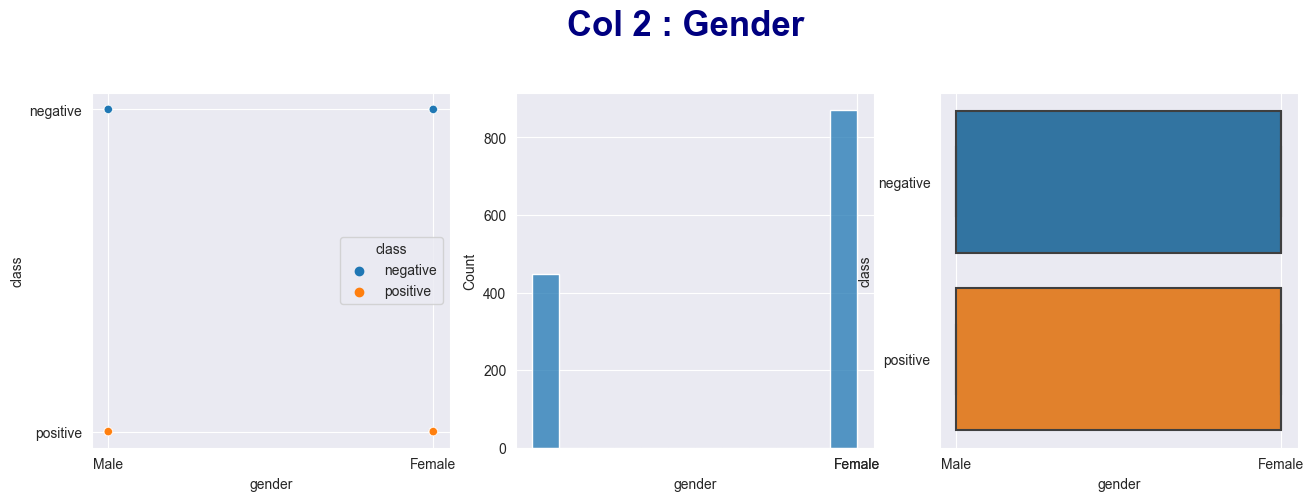

In [10]:
# col2 : gender
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 2 : Gender', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='gender', y='class', ax=axes[0], hue='class')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(np.array(['Male', 'Female']))

# ax2
sns.histplot(data=data, x='gender', ax=axes[1])
axes[1].set_xticks([1, 1])
axes[1].set_xticklabels(np.array(['Male', 'Female']))

# ax3
sns.boxplot(data=data, x='gender', y='class', ax=axes[2])
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(np.array(['Male', 'Female']))

plt.show()

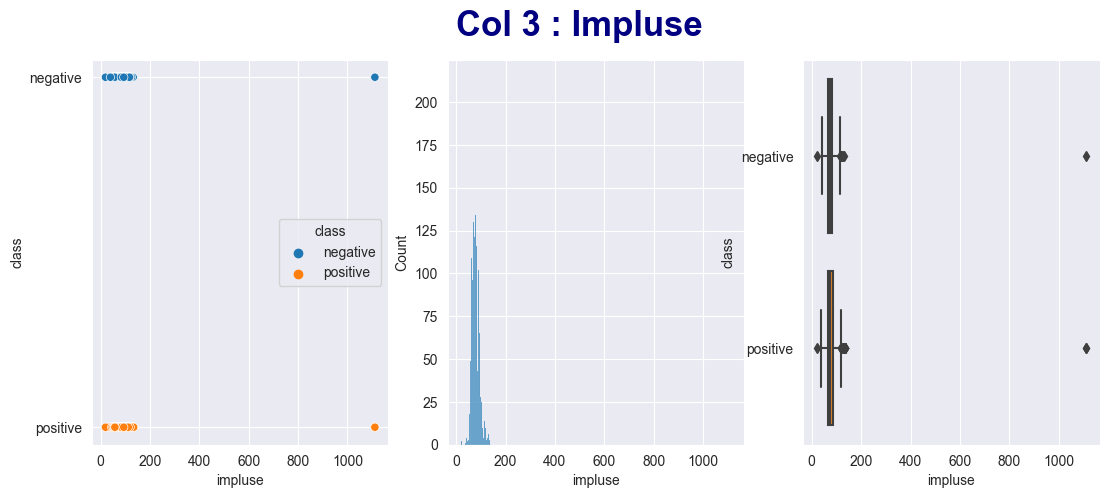

In [11]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 3 : Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=data, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=data, x='impluse', y='class', ax=axes[2])

plt.show()

In [12]:
data[data.impluse>1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [13]:
condition = data.impluse<1000
data2 = data[condition]

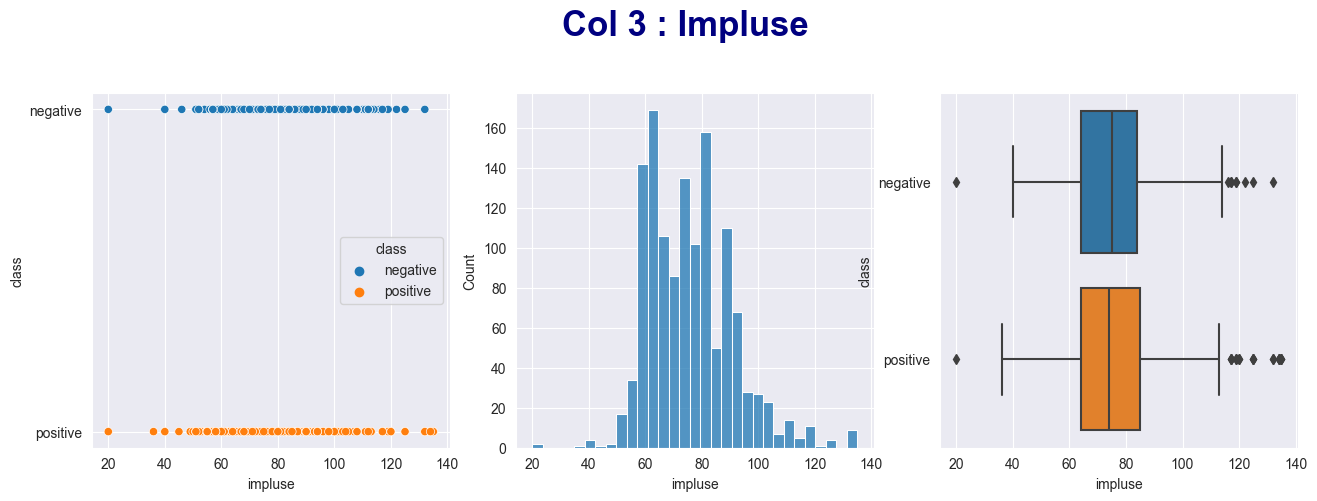

In [14]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 3 : Impluse', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='impluse', y='class', ax=axes[2])

plt.show()

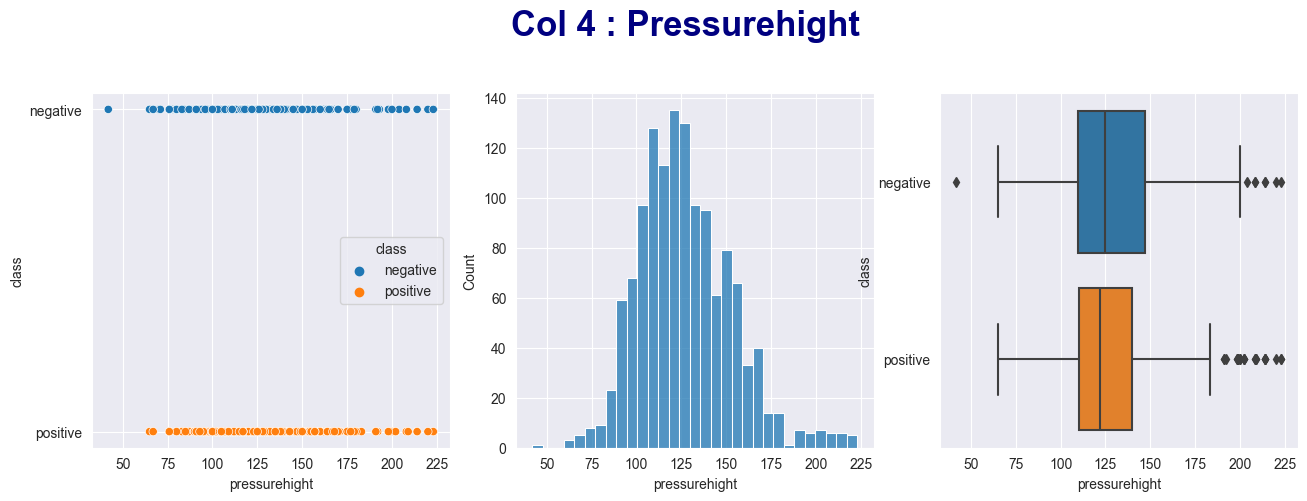

In [15]:
# Col4 : pressurehight
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 4 : Pressurehight', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='pressurehight', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='pressurehight', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='pressurehight', y='class', ax=axes[2])

plt.show()

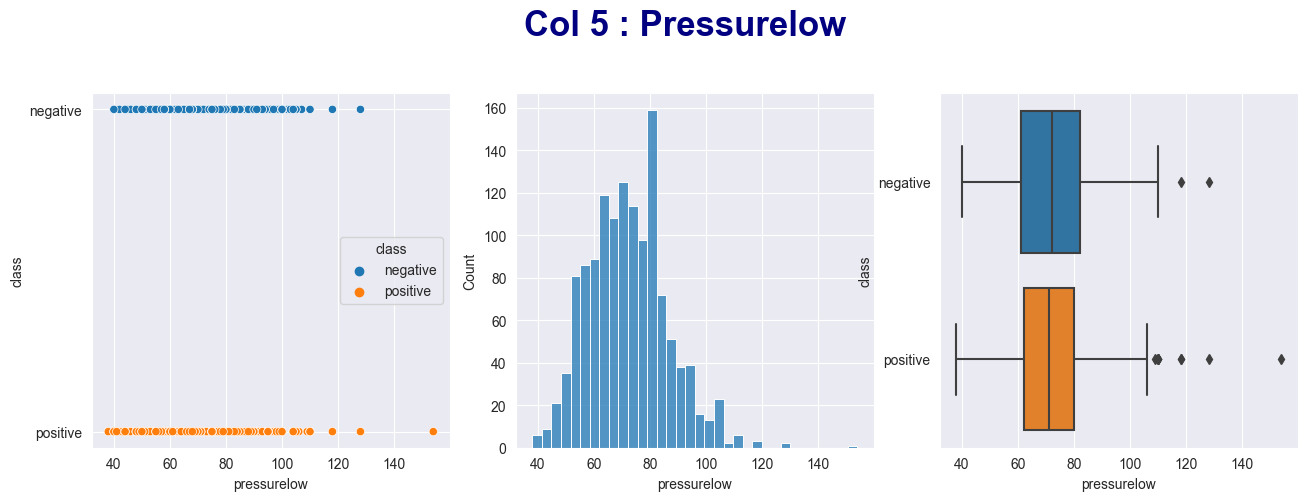

In [16]:
# Col5 : pressurelow
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 5 : Pressurelow', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='pressurelow', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='pressurelow', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='pressurelow', y='class')
plt.show()


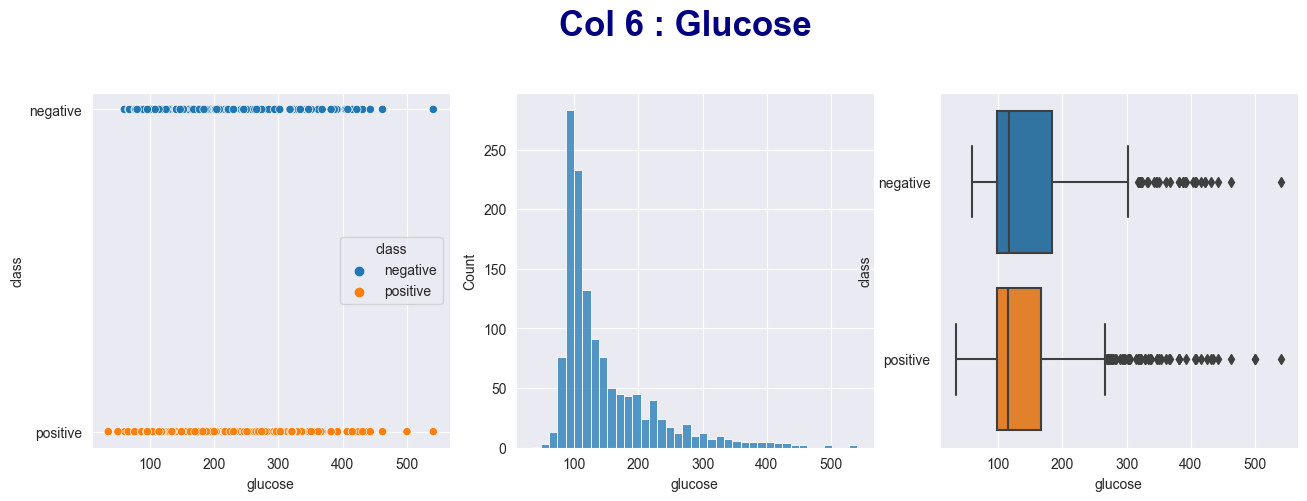

In [17]:
# Col6 : glucose
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 6 : Glucose', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='glucose', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='glucose', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='glucose', y='class')
plt.show()

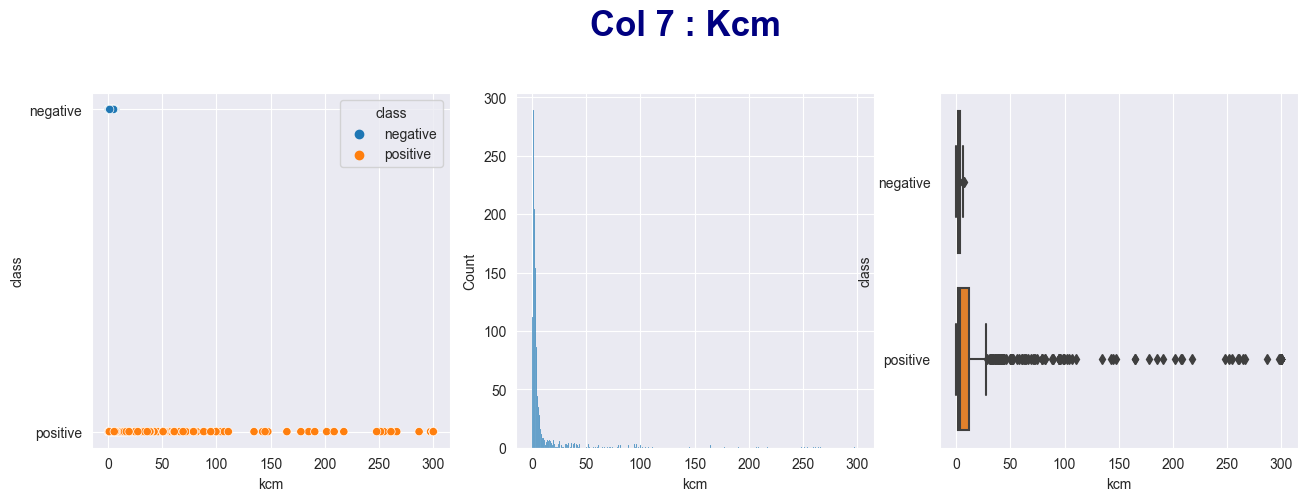

In [18]:
# Col6 : kcm
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 7 : Kcm', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='kcm', y='class')
plt.show()


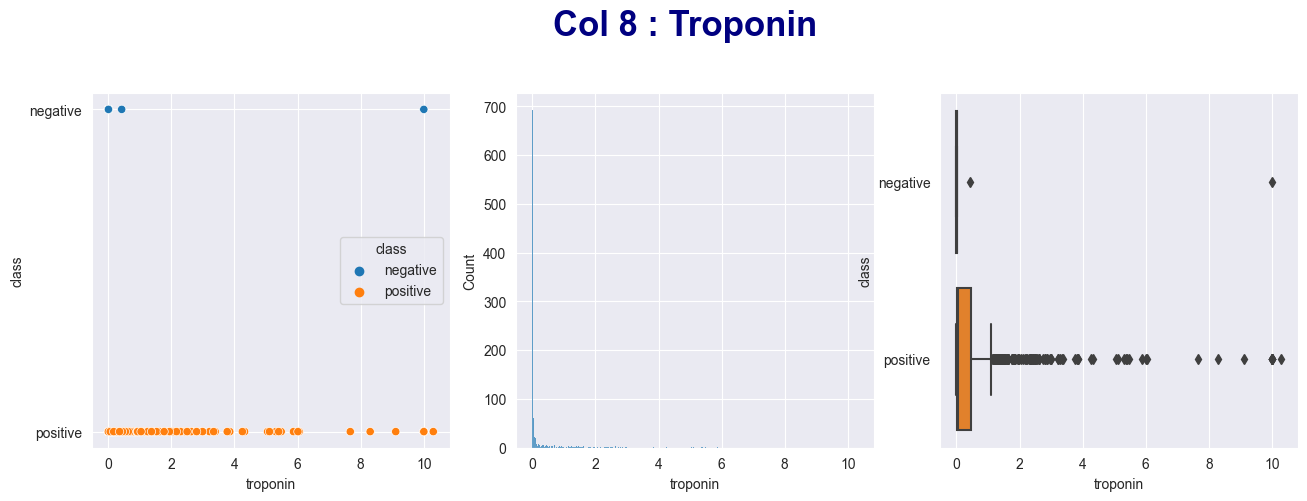

In [19]:
# Col6 : troponin
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 8 : Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=data2, x='troponin', y='class')
plt.show()


In [20]:
d1 = data2['class']=='negative'
d11 = data2[d1]

d2 = d11.troponin > 9
d22 = d11[d2]

d22

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
29,63,1,66,135,55,166.0,0.493,10.0,negative


In [21]:
data2[data2.troponin==10.0][data2['class']=='negative']

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
29,63,1,66,135,55,166.0,0.493,10.0,negative


In [22]:
data2.drop(index=29, inplace=True)
data2.reset_index(drop=True, inplace=True)

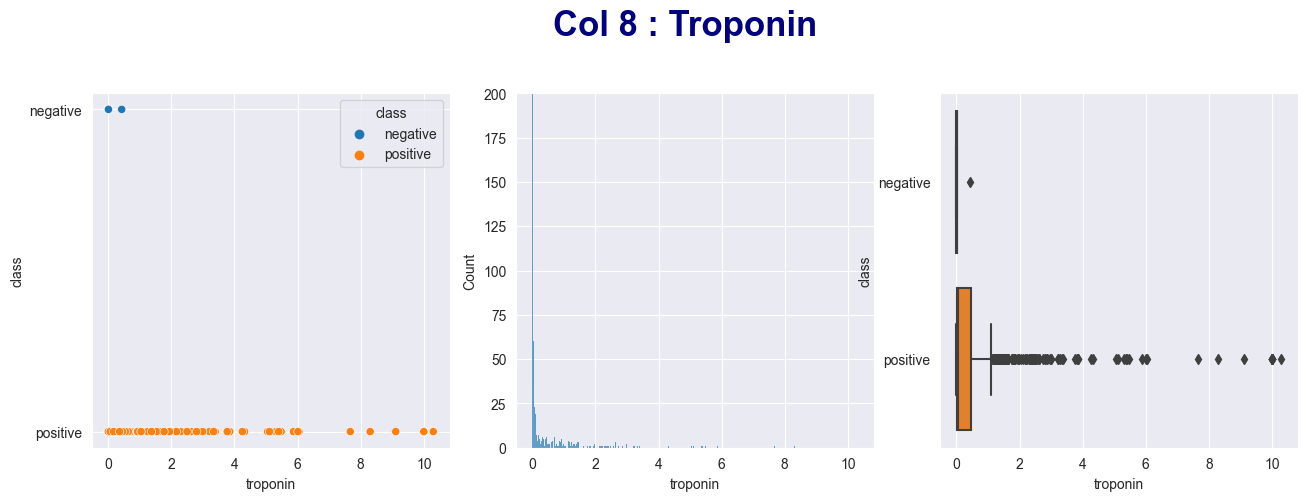

In [23]:
# Col6 : troponin
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Col 8 : Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data2, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data2, x='troponin', ax=axes[1])
axes[1].set_ylim([0, 200])

# ax3
sns.boxplot(data=data2, x='troponin', y='class')
plt.show()

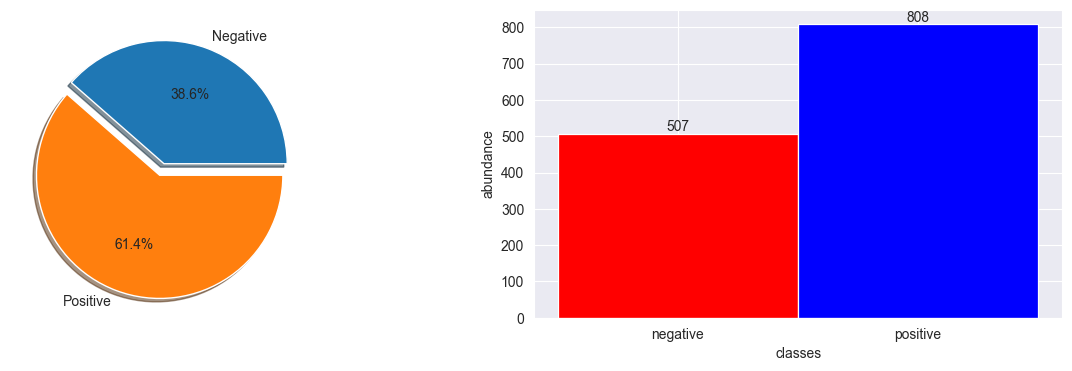

In [24]:
# Target
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# ax1
d = data2[['class']]
d = d.groupby('class').size()
labels = ['Negative', 'Positive']
explode = (0, 0.1)
axes[0].pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)

# ax 2
c = ['red', 'blue']
x = data2['class'].value_counts().sort_values().index
y = data2['class'].value_counts().sort_values()
bar_container = axes[1].bar(x, y, color=c, width=1, edgecolor="white", linewidth=0.9)
axes[1].bar_label(bar_container)
axes[1].set(xlabel='classes', ylabel='abundance', xticks=np.arange(0, 1.5))
plt.show()


<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:10px; border:solid 4px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling</p></b></h1>

In [25]:
X = data2.drop(columns='class')
y = data2['class']

In [26]:
X

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1310,44,1,94,122,67,204.0,1.63,0.006
1311,66,1,84,125,55,149.0,1.33,0.172
1312,45,1,85,168,104,96.0,1.24,4.250
1313,54,1,58,117,68,443.0,5.80,0.359


In [27]:
y

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1310    negative
1311    positive
1312    positive
1313    positive
1314    positive
Name: class, Length: 1315, dtype: object

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.1 | </span><span style="color:#9b006e">DecisionTreeClassifier</span></b></h2> 

In [32]:
DTs = DecisionTreeClassifier()
DTs.fit(X_train, y_train)
DTs_pred = DTs.predict(X_test)
DTs_acc = accuracy_score(DTs_pred, y_test)
print("Test accuracy: {:.2f}%".format(DTs_acc*100))

Test accuracy: 98.48%


In [35]:
print(classification_report(y_test, DTs_pred))

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98       102
    positive       0.99      0.98      0.99       161

    accuracy                           0.98       263
   macro avg       0.98      0.99      0.98       263
weighted avg       0.98      0.98      0.98       263



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.2 | </span><span style="color:#9b006e">RandomForestClassifier</span></b></h2> 

In [36]:
RFs = RandomForestClassifier()
RFs.fit(X_train, y_train)
RFs_pred = RFs.predict(X_test)
RFs_acc = accuracy_score(RFs_pred, y_test)
print("Test accuracy: {:.2f}%".format(RFs_acc*100))

Test accuracy: 98.10%


In [37]:
print(classification_report(y_test, RFs_pred))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.98       102
    positive       0.99      0.98      0.98       161

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.3 | </span><span style="color:#9b006e">KNeighborsClassifier</span></b></h2> 

In [38]:
Knn = KNeighborsClassifier()
Knn.fit(X_train, y_train)
Knn_pred = Knn.predict(X_test)
Knn_acc = accuracy_score(Knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(Knn_acc*100))

Test accuracy: 60.08%


In [39]:
print(classification_report(y_test, Knn_pred))

              precision    recall  f1-score   support

    negative       0.48      0.47      0.48       102
    positive       0.67      0.68      0.68       161

    accuracy                           0.60       263
   macro avg       0.58      0.58      0.58       263
weighted avg       0.60      0.60      0.60       263



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.4 | </span><span style="color:#9b006e">LogisticRegression</span></b></h2> 

In [42]:
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr_pred = Lr.predict(X_test)
Lr_acc = accuracy_score(Lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(Lr_acc*100))

Test accuracy: 79.47%


In [43]:
print(classification_report(y_test, Lr_pred))

              precision    recall  f1-score   support

    negative       0.73      0.75      0.74       102
    positive       0.84      0.83      0.83       161

    accuracy                           0.79       263
   macro avg       0.78      0.79      0.78       263
weighted avg       0.80      0.79      0.80       263



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.5 | </span><span style="color:#9b006e">SVC</span></b></h2> 

In [44]:
SVC = SVC()
SVC.fit(X_train, y_train)
SVC_pred = SVC.predict(X_test)
SVC_acc = accuracy_score(SVC_pred, y_test)
print("Test accuracy: {:.2f}%".format(SVC_acc*100))

Test accuracy: 67.30%


In [45]:
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

    negative       0.65      0.33      0.44       102
    positive       0.68      0.89      0.77       161

    accuracy                           0.67       263
   macro avg       0.67      0.61      0.61       263
weighted avg       0.67      0.67      0.64       263



In [47]:
result = pd.DataFrame({
    'Model': ['DTs', 'RF', 'knn', 'Lr', 'SVC'],
    'Accuracy' : [DTs_acc, RFs_acc, Knn_acc, Lr_acc, SVC_acc]
})

result.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,DTs,0.984791
1,RF,0.980989
3,Lr,0.794677
4,SVC,0.673004
2,knn,0.600760


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul><b>DecisionTreeClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:navy">So, We choose <mark> DecisionTreeClassifier </mark></span>
</div>

<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>